In [1]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [5]:
# For Data Pre-processing
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer   
from textblob import Word, TextBlob
from wordcloud import WordCloud , STOPWORDS

df=pd.read_csv(r"C:\Users\USER\cleaned_emirates_reviews.csv")

# For topic modeling
#from sklearn.decomposition import NMF, LatentDirichletAllocation

# For sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
def replace(text):            # Define a function to clean the text
    text = re.sub(r'[^A-Za-z]+', ' ', str(text)) # Replaces all special characters and numericals with blanks and leaving the alphabets
    return text

In [7]:
# Cleaning the text in the review column
df['Reviews']= df["Review Text"].apply(replace)
df.head()

,Reviewer Name,Reviewer Country,Number of Reviews,Review Text,Star Rating,Date of Experience,Reviews
0,Phil Mckibben,Australia,3,Don't bother booking with this POS…\nDon't bot...,1.0,12/2/2024,Don t bother booking with this POS Don t bothe...
1,LYNSEY FLETCHER,United Kingdom,5,I don’t even want to give Emirates a…\nI don’t...,1.0,12/8/2024,I don t even want to give Emirates a I don t e...
2,Mabel,Hong Kong,6,"Really bad service, don’t pay for seat. Avoid\...",NaN,1/12/2025,Really bad service don t pay for seat Avoid I ...
3,David Dunlop,United Kingdom,13,No customer service\nMy wife was flying from G...,1.0,12/2/2024,No customer service My wife was flying from Gl...
4,Customer,France,10,Emirates 0/10\nCustomer service was slow in re...,NaN,1/7/2025,Emirates Customer service was slow in replying...


In [8]:
#converting in lower case
df['Reviews'] = df['Reviews'].str.lower()

In [9]:
#removing punctuation
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]', '')

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\USER\AppData\Local\Temp\ipykernel_27348\3292352424.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['Reviews'] = df['Reviews'].str.replace('[^\w\s]', '')


In [10]:
#removing numbers
df['Reviews'] = df['Reviews'].str.replace('\d', '')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_27348\150864627.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Reviews'] = df['Reviews'].str.replace('\d', '')


In [11]:
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

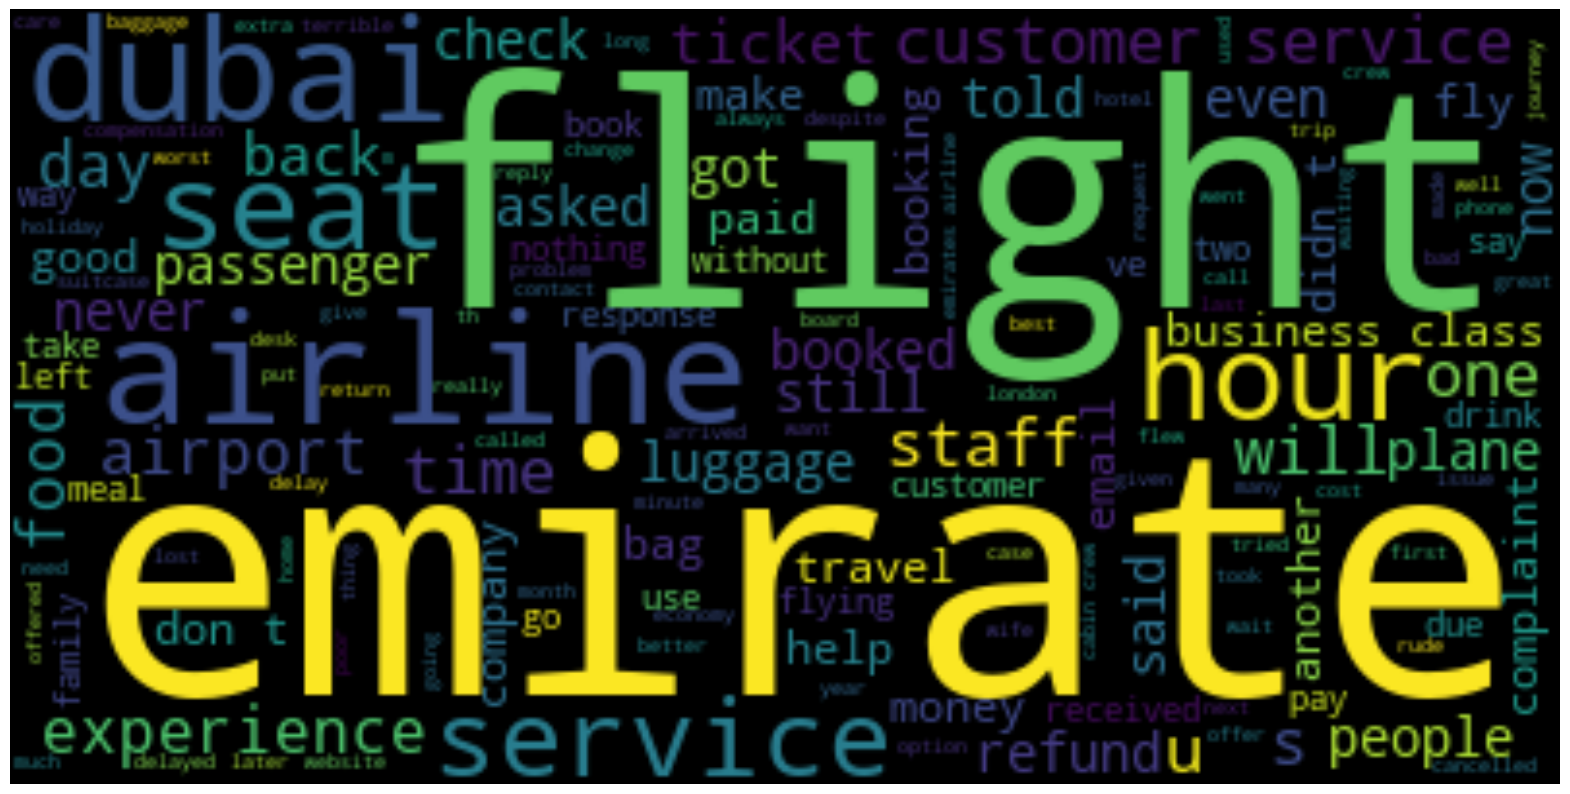

In [12]:
text = " ".join(i for i in df.Reviews)
wordcloud = WordCloud().generate(text)
fig = plt.figure(1, figsize=(20, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Reviews'].apply(vadersentimentanalysis)


def vader_analysis(compound):                
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()


,Reviewer Name,Reviewer Country,Number of Reviews,Review Text,Star Rating,Date of Experience,Reviews,Sentiment,Analysis
0,Phil Mckibben,Australia,3,Don't bother booking with this POS…\nDon't bot...,1.0,12/2/2024,don t bother booking with this pos don t bothe...,-0.7096,Negative
1,LYNSEY FLETCHER,United Kingdom,5,I don’t even want to give Emirates a…\nI don’t...,1.0,12/8/2024,i don t even want to give emirates a i don t e...,-0.4915,Negative
2,Mabel,Hong Kong,6,"Really bad service, don’t pay for seat. Avoid\...",NaN,1/12/2025,really bad service don t pay for seat avoid i ...,-0.9359,Negative
3,David Dunlop,United Kingdom,13,No customer service\nMy wife was flying from G...,1.0,12/2/2024,no customer service my wife was flying from gl...,-0.9146,Negative
4,Customer,France,10,Emirates 0/10\nCustomer service was slow in re...,NaN,1/7/2025,emirates customer service was slow in replying...,0.3354,Neutral


In [14]:
analysis = df['Analysis'].value_counts()
analysis

Analysis
Negative    396
Positive    154
Neutral      50
Name: count, dtype: int64

In [15]:
categories = {
    "Cabin Crew": ["staff", "crew", "attendant", "service"],
    "Food": ["meal", "food", "drink", "beverage"],
    "Comfort": ["seat", "legroom", "space", "comfort"],
    "Customer Service": ["customer", "support", "help", "complaint"],
}


In [16]:
def classify_review_category(review):
    for category, keywords in categories.items():
        if any(keyword in review.lower() for keyword in keywords):
            return category
    return "Other"
df['Category'] = df['Reviews'].apply(classify_review_category)


In [17]:
def vader_analysis(review):                
    vs = analyzer.polarity_scores(review)
    if vs['compound'] >= 0.5:
        return 'Positive'
    elif vs['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Reviews'].apply(vader_analysis)


In [18]:
df['Category_Sentiment'] = df['Category'] + " - " + df['Sentiment']


In [19]:
results = df.groupby('Category_Sentiment').size()
print(results)


Category_Sentiment
Cabin Crew - Negative          258
Cabin Crew - Neutral            24
Cabin Crew - Positive          113
Comfort - Negative              19
Comfort - Neutral                3
Comfort - Positive               8
Customer Service - Negative     31
Customer Service - Neutral       4
Customer Service - Positive      8
Food - Negative                 16
Food - Neutral                   2
Food - Positive                  7
Other - Negative                72
Other - Neutral                 17
Other - Positive                18
dtype: int64
